In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

### Details of column
- datetime - hourly date + timestamp 
    - datatime - 타임스탬프 형식으로 표현, 연-월-일 시:분:초
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
    - season - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- holiday - whether the day is considered a holiday
    - holiday - 공휴일(1), 공휴일X (0)

- workingday - whether the day is neither a weekend nor holiday
    - workingday - 근무일(1), 근무일X (0)

- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy / 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist / 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds / 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    - weather(날씨) - (1) 맑음, 약간의 구름, 부분 구름
                 (2) 약간의 구름과 안개
                 (3) 약간의 눈이나 비, 천둥
                 (4) 심한 비, 우박, 천둥, 안개, 눈
- temp - temperature in Celsius
    - temp(온도) - 섭씨
- atemp - "feels like" temperature in Celsius
    - atemp(체감온도) - 체감온도 섭씨
- humidity - relative humidity
    - humidity(습도) - 상대적인 습도
- windspeed - wind speed
    - windspeed - 풍속
- casual - number of non-registered user rentals initiated
    - casual - 비회원의 자전거 대여량
- registered - number of registered user rentals initiated
    - registered - 회원의 자전거 대여량
- count - number of total rentals
    - count - 총 대여량 (causal + registered)

In [2]:
# train.csv 파일을 train이라는 변수에 할당시킨다.
train = pd.read_csv('../bike-sharing-demand/train.csv', parse_dates=["datetime"])
# parse_dates

train.info()
# train.info()를 통해서 결측치가 없음을 알 수 있다.

#해당 데이터의 상위 5개의 열을 본다.
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# test데이터 또한 위와 같이 불러온다. train 데이터와 마찬가지로 결측치가 없다.
test = pd.read_csv('../bike-sharing-demand/test.csv', parse_dates=["datetime"])
test.info()
test.head(5)

# test 데이터에는 3개의 정답 행이 제외되어 있는 것을 볼 수 있다. 
# 정답행 -> casual, registered, count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
# 모든 데이터는 숫자형식으로 되어 있지만 datetime만은 그렇지 않다. 따라서 전처리가 필요.
# dt.year / month / day / hour / minute / second를 활용하여 분리해준다.
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

# dayofweek를 활용해 날짜에서 요일을 가져온다.
# 0:월 / 1:화 / 2:수 / 3: 목 / 4:금 / 5:토 / 6:일
train["dayofweek"] = train["datetime"].dt.dayofweek
#del train["datetime"]

train.head(5)
# 입력한 열들 추가된 것을 확인해 볼 수 있다.


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [5]:
# test 데이터도 위와 동일하게 만들어준다.
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second

# dayofweek를 활용해 날짜에서 요일을 가져온다.
# 0:월 / 1:화 / 2:수 / 3: 목 / 4:금 / 5:토 / 6:일
test["dayofweek"] = test["datetime"].dt.dayofweek
test = test.drop(['datetime'], axis =1)
test.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


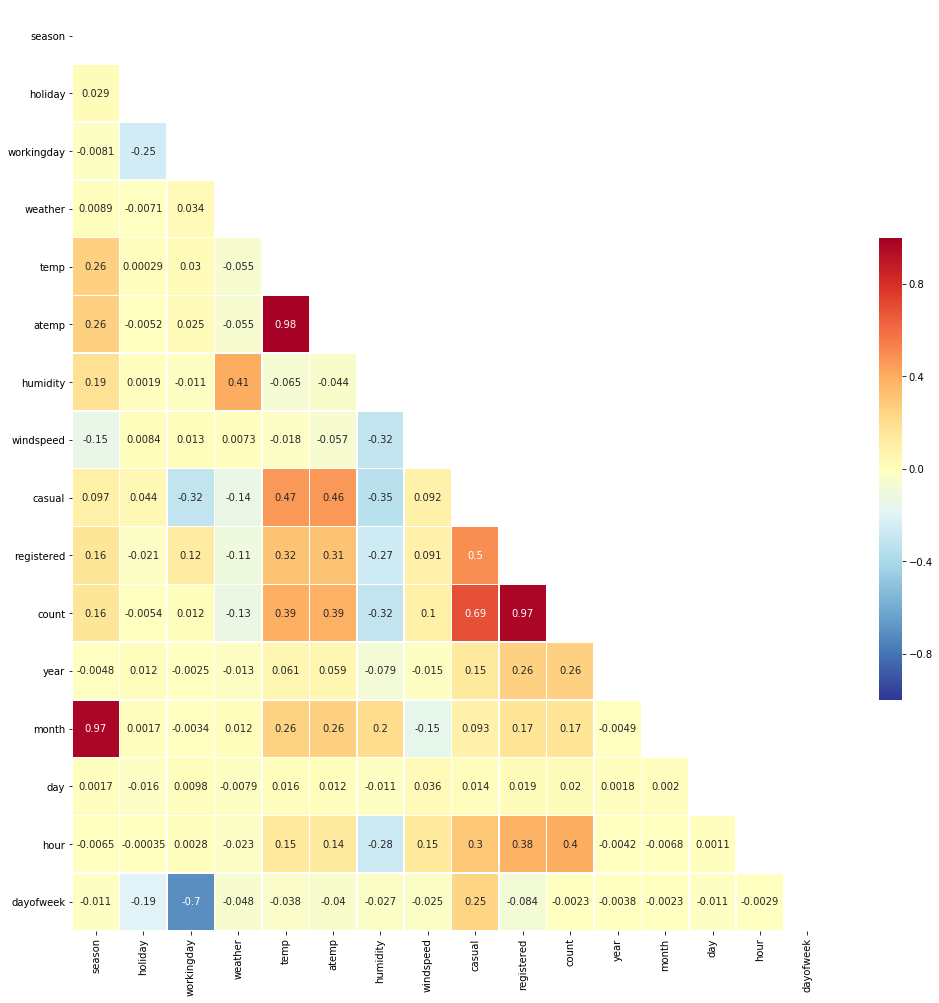

In [6]:
# 상관관계를 확인해보기 위해 아래와 같이 heatmap을 그려보았다.

df = train.copy()
df = df.drop(['datetime', 'minute', 'second'], axis =1)
# minute과 second는 의미가 없어보여, 우선 상관관계를 보는 곳에서는 제외시켰다.
df.head(5)

df = df.corr()
fig, ax = plt.subplots( figsize=(17,17) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


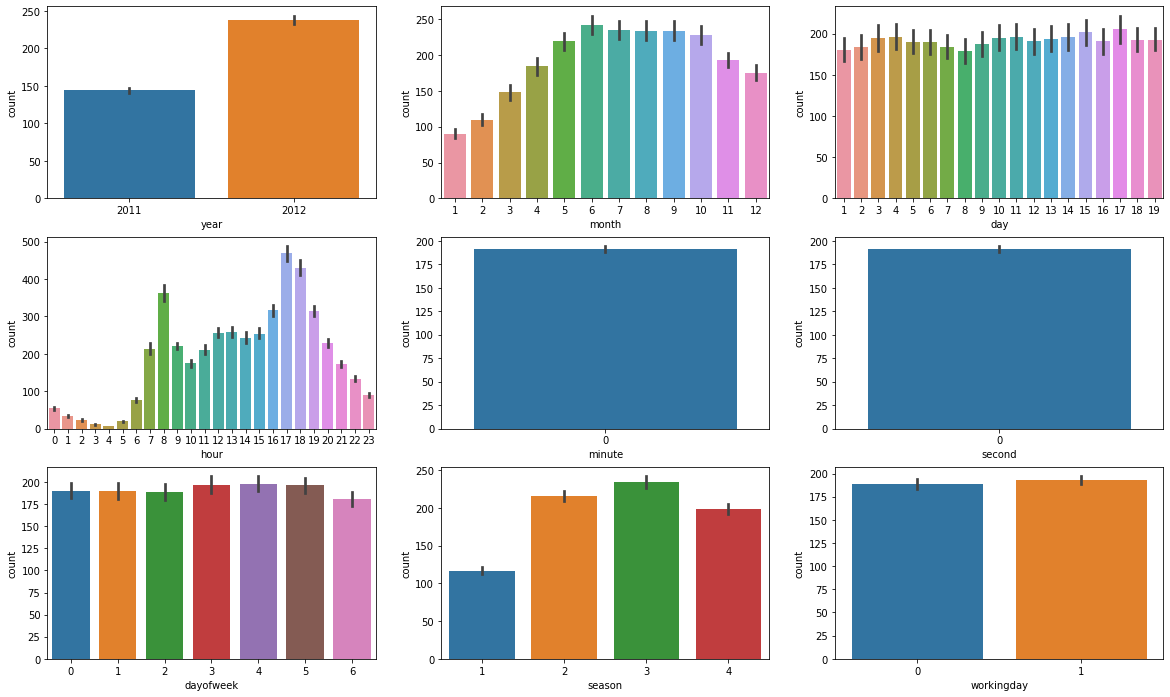

In [7]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows =3, ncols =3)

figure.set_size_inches(20, 12)
sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)
sns.barplot(data = train, x = "day", y = "count", ax = ax3)
sns.barplot(data = train, x = "hour", y = "count", ax = ax4)
sns.barplot(data = train, x = "minute", y = "count", ax = ax5)
sns.barplot(data = train, x = "second", y = "count", ax = ax6)
sns.barplot(data = train, x = "dayofweek", y = "count", ax = ax7)
sns.barplot(data = train, x = "season", y = "count", ax = ax8)
sns.barplot(data = train, x = "workingday", y = "count", ax = ax9)

# # 그래프들을 통해서 아래와 같이 유추해보았다.
# 1. 2011년보다 2012년에 자전거를 더 많이 탔다.
# 2. 6월이 가장 많이 이용했으며, 7,8,9월은 비슷, 그리고 1월이 가장 이용률이 낮음을 알 수 있다. -> 계절 및 날씨가 상관이 있을 수 있음을 유추.
# 3. day는 학습에서 제외시켜야 한다. -> train에는 19일까지 밖에 나와있지 않고, 그 이후는 모두 test에 있으므로 방해가 될 요소가 있다.
# 4. 자정에서 새벽5시까지는 이용률이 현저히 낮다. 아침 시간대에는 8시, 저녁에는 5시와 6시가 이용률이 많으므로 
# 사람들이 출퇴근 시간에 많이 이용하는 것이 아닐까 생각해볼 수 있다.
# 5. 일요일을 제외하고는 모든 날의 이용량이 비슷하다.
# 6. 위의 월에서 유추한 것과는 약간 다르게 겨울보다는 봄의 이용량이 더 낮다. 봄의 이용량이 가장 낮고, 가을 이용량이 가장 높다.
# 7. 근무일의 사용량이 미세하게 더 높다.


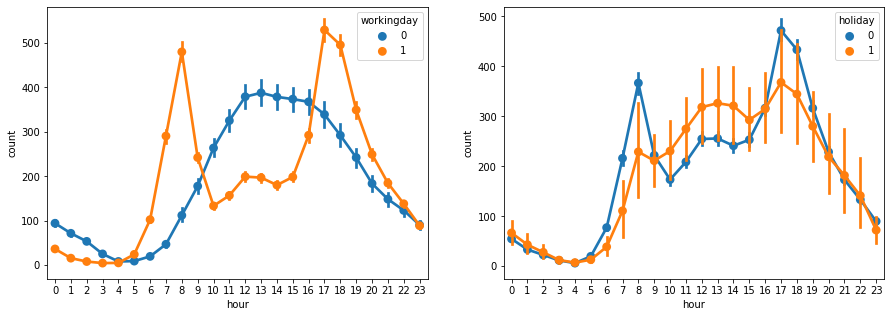

In [8]:
# workingday (근무일), holiday(휴일)의 차이가 크게 보이지 않으므로, 다른 특성과 함께 확인해본다.
figure, (ax1, ax2) = plt.subplots(nrows =1, ncols =2)
figure.set_size_inches(15, 5)
sns.pointplot(data = train, x = "hour", y = "count", hue = "workingday", ax = ax1)
sns.pointplot(data = train, x = "hour", y = "count", hue = "holiday", ax = ax2)

# 근무일과 휴일은 서로 상호 보완적인 관계이기 때문의 양 그래프가 거의 비슷하다.
# 우선 그래프 상에서 근무일에는 사람을이 주로 출퇴근에 자전거를 이용하는 것으로 보인다.
# 반면 공휴일에는 출퇴근 시간보다는 여가를 즐기는 시간에 이용하는 것으로 유추해볼 수 있다.


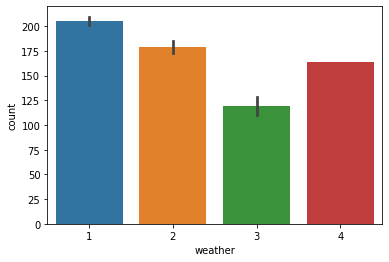

In [9]:
sns.barplot(data = train, x = "weather", y = "count")

# 날씨 좋은 날에 자전거를 많이 탈 것이다라는 예상과는 알맞게 1,2가 가장 많이 이용하는 것으로 나타남.
# 그러나, 4가 가장 나쁜 날씨임에도 불구하고 가장 3번째로 이용량이 많다는 것은 조금 의아하게 생각해볼 필요가 있음.

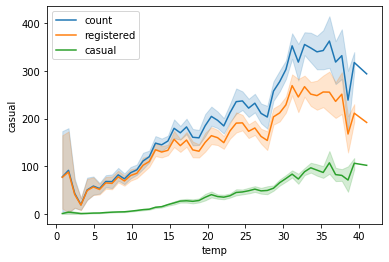

In [10]:
sns.lineplot(data = train, x = "temp", y = "count", label = 'count')
sns.lineplot(data = train, x = "temp", y = "registered", label = 'registered')
sns.lineplot(data = train, x = "temp", y = "casual", label = 'casual')

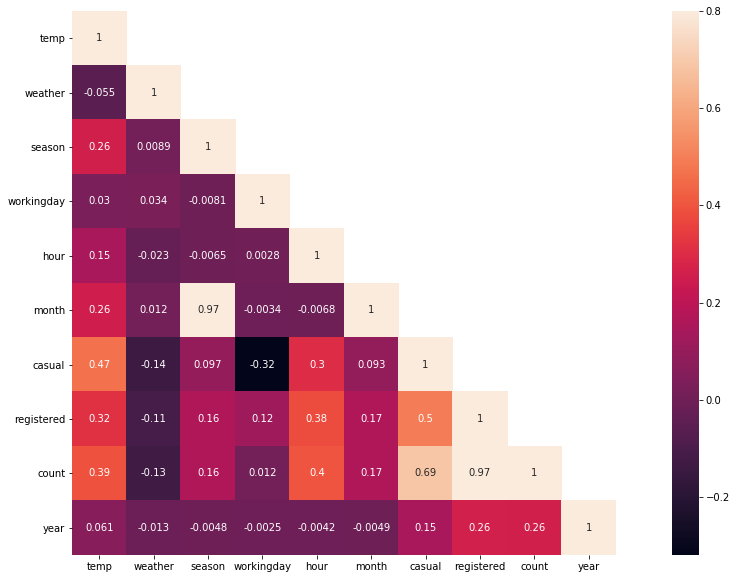

In [11]:
# 의미있어 보이는 feature들만 가지고 상관관계를 재분석 해보자.
re_corr = train [['temp', 'weather', 'season', 'workingday', 'hour', 'month', 'casual', 'registered', 'count', 'year']]
re_corr = re_corr.corr()
mask = np.array(re_corr)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(re_corr, mask=mask, vmax=.8, square=True, annot = True)
plt.show()

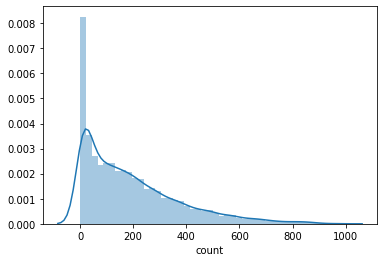

In [12]:
sns.distplot(train["count"]);
# count행을 살펴보니, 왼쪽으로 심하게 치우쳐져있는 모습을 보인다.

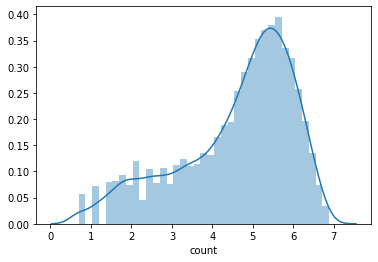

In [13]:
# 따라서 로그 변환을 사용하여 정규분포로 변환해준다.
train["count"] = np.log1p(train["count"])
sns.distplot(train["count"]);

In [14]:
# 정답인 count열을 y에 따로 떼어준다.
y = train[['count']]
y.head(5)

print(y.shape)

(10886, 1)


In [15]:
train = train.drop(['datetime','day', 'minute', 'second', 'windspeed', 'count', 'casual', 'registered'], axis=1)
train.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,2011,1,4,5


# Modeling

In [16]:
X = train
X.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,2011,1,4,5


In [17]:
test.head()
test = test.drop(['windspeed', 'minute', 'day', 'second'], axis=1)

In [18]:
test.head()

#train과 test의 열들을 다 맞춰주었다.

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,2011,1,0,3
1,1,0,1,1,10.66,13.635,56,2011,1,1,3
2,1,0,1,1,10.66,13.635,56,2011,1,2,3
3,1,0,1,1,10.66,12.880,56,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,2011,1,4,3


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import model_selection, preprocessing

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 11)
(2178, 11)
(8708, 1)
(2178, 1)


In [21]:
clf = LinearRegression(normalize= True)
clf.fit(X_train, y_train)
print("The accuracy of linear regression is: ", clf.score(X_test, y_test))

The accuracy of linear regression is:  0.48864898134877915


In [22]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
print("The accuracy of Decision Tree Regressor is: ", clf.score(X_test, y_test))

The accuracy of Decision Tree Regressor is:  0.9150602093753588


In [23]:
clf = RandomForestRegressor(n_estimators= 200)
clf.fit(X_train, y_train)
print('The accuracy of Random Forest Regressor is: ', clf.score(X_test, y_test))

/Users/soeunyi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


The accuracy of Random Forest Regressor is:  0.9567118402394931


In [24]:
import tensorflow as tf
from keras import models
from keras import layers

/Users/soeunyi/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/soeunyi/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/soeunyi/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/soeunyi/miniconda3/lib/python3.7/site-packages/tensorflow/python/f

In [25]:
model = models.Sequential()

In [26]:
model.add(layers.Dense(256, input_dim=11))
model.add(layers.Dense(256))
model.add(layers.Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.fit(X_train, y_train, epochs=50, batch_size=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
8708/8708 [==============================] - 17s 2ms/step - loss: 273.2081 - acc: 0.0000e+00
Epoch 2/50
8708/8708 [==============================] - 18s 2ms/step - loss: 8.4060 - acc: 0.0000e+00
Epoch 3/50
8708/8708 [==============================] - 18s 2ms/step - loss: 1.6826 - acc: 0.0000e+00
Epoch 4/50
8708/8708 [==============================] - 19s 2ms/step - loss: 1.5215 - acc: 0.0000e+00
Epoch 5/50
8708/8708 [==============================] - 20s 2ms/step - loss: 1.4116 - acc: 0.0000e+00
Epoch 6/50
8708/8708 [==============================] - 25s 3ms/step - loss: 1.3679 - acc: 0.0000e+00
Epoch 7/50
8708/8708 [==============================] - 28s 3ms/step - loss: 1.3643 - acc: 0.0000e+00
Epoch 8/50
7894/8708 [==========================>...] - ETA: 2s - loss: 1.3541 - acc: 0.0000e+00

In [ ]:
mse, acc = model.evaluate(X_test, y_test, batch_size=1)
print ('acc:', acc, 'mse:', mse)

In [ ]:
x_pred = x_test
aaa = model.predict(x_pred, batch_size = 1)
print (aaa)